# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [3]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [4]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
boston.data.shape

(506, 13)

In [12]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [14]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [15]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [19]:
print(boston.target.shape)

(506,)


In [20]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [22]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

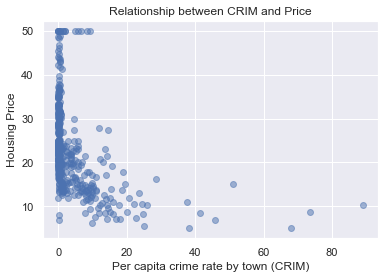

In [456]:
plt.scatter(bos.CRIM, bos.PRICE, alpha=.5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price");

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship
Negative exponetial relationship closely describes this graph. There's a group of outliers with very high home prices but the crime rate goes up from near 0 to 15 units. In general, when crime rate goes down, home prices increase.
<br><br>
The most interesting relationship will be between rooms and price. Other variables of interesting may be related to location, NO2 emissions, or deomgraphics of people int the area.
<br><br>
* Looking at the plots below, there's strong positive correlation between number of rooms and home prices. 
* There is a weak negavtive correlation between NO2 and prices.
* There appears to be a very weak negative correlation between age of home and prices.
* There is a moderate negative correlation between prices and lower status people in those locations which isn't surprising.

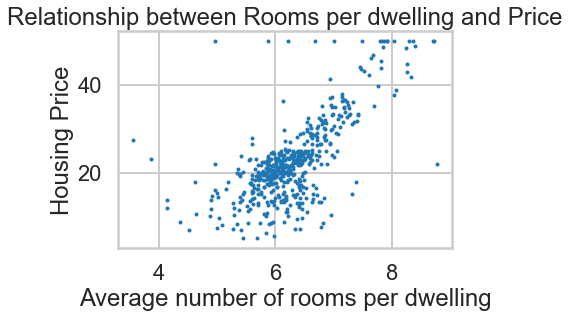

In [29]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, s=4)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between Rooms per dwelling and Price");

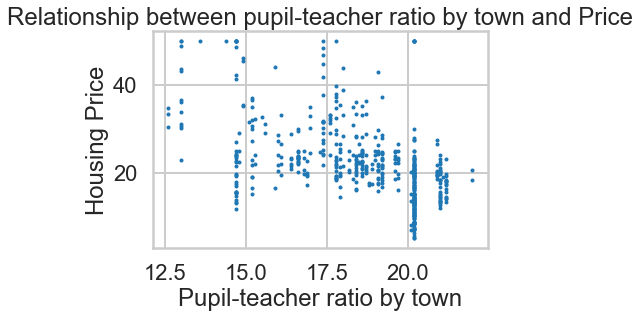

In [31]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, s=4)
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between pupil-teacher ratio by town and Price");

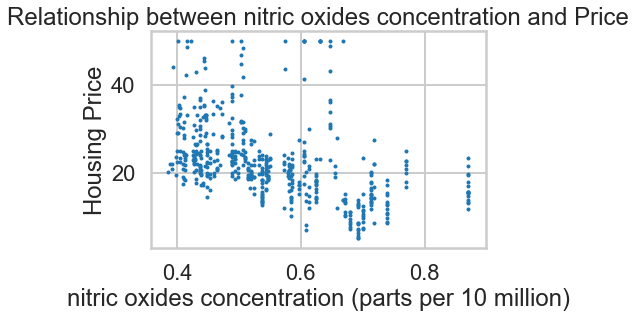

In [34]:
# your turn: create some other scatter plots
plt.scatter(bos.NOX, bos.PRICE, s=4)
plt.xlabel("nitric oxides concentration (parts per 10 million)")
plt.ylabel("Housing Price")
plt.title("Relationship between nitric oxides concentration and Price");

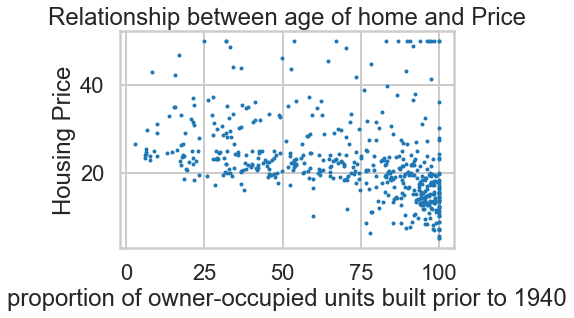

In [36]:
# your turn: create some other scatter plots
plt.scatter(bos.AGE, bos.PRICE, s=4)
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("Housing Price")
plt.title("Relationship between age of home and Price");

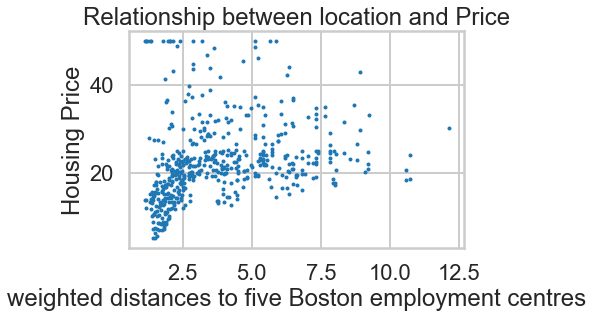

In [44]:
# your turn: create some other scatter plots
plt.scatter(bos.DIS, bos.PRICE, s=4)
plt.xlabel("weighted distances to five Boston employment centres")
plt.ylabel("Housing Price")
plt.title("Relationship between location and Price");

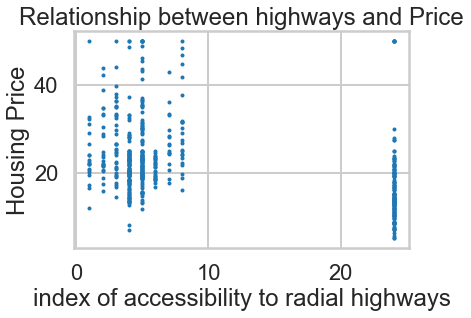

In [45]:
# your turn: create some other scatter plots
plt.scatter(bos.RAD, bos.PRICE, s=4)
plt.xlabel("index of accessibility to radial highways")
plt.ylabel("Housing Price")
plt.title("Relationship between highways and Price");

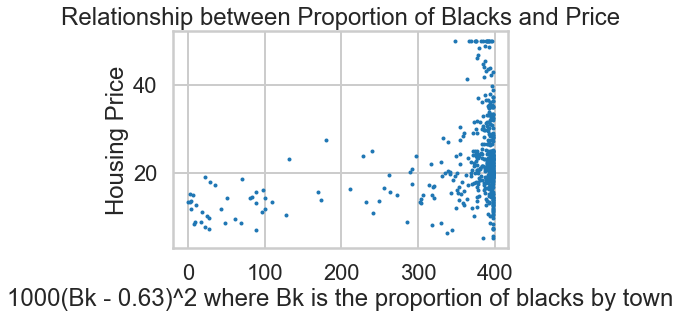

In [46]:
# your turn: create some other scatter plots
plt.scatter(bos.B, bos.PRICE, s=4)
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Housing Price")
plt.title("Relationship between Proportion of Blacks and Price");

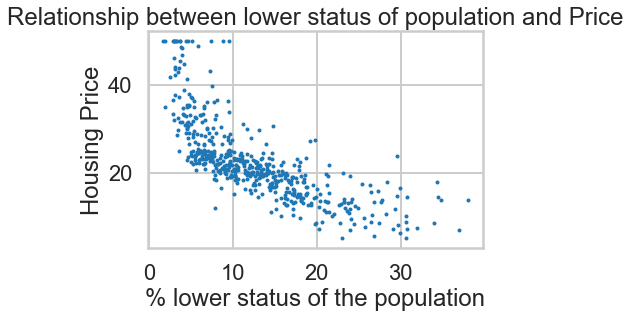

In [47]:
# your turn: create some other scatter plots
plt.scatter(bos.LSTAT, bos.PRICE, s=4)
plt.xlabel("% lower status of the population")
plt.ylabel("Housing Price")
plt.title("Relationship between lower status of population and Price");

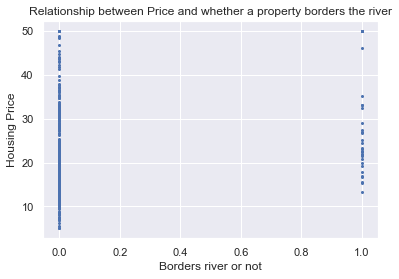

In [261]:
# your turn: create some other scatter plots
plt.scatter(bos.CHAS, bos.PRICE, s=4)
plt.xlabel("Borders river or not")
plt.ylabel("Housing Price")
plt.title("Relationship between Price and whether a property borders the river");

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

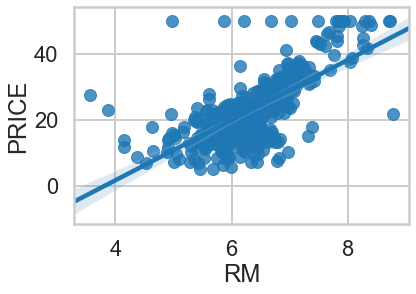

In [54]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True);

### Histograms
***


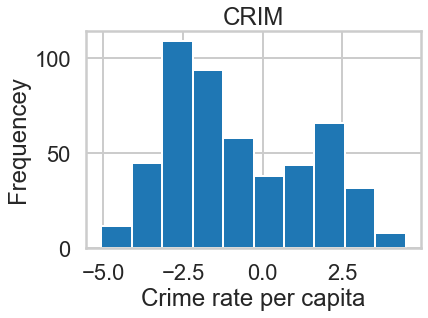

In [57]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

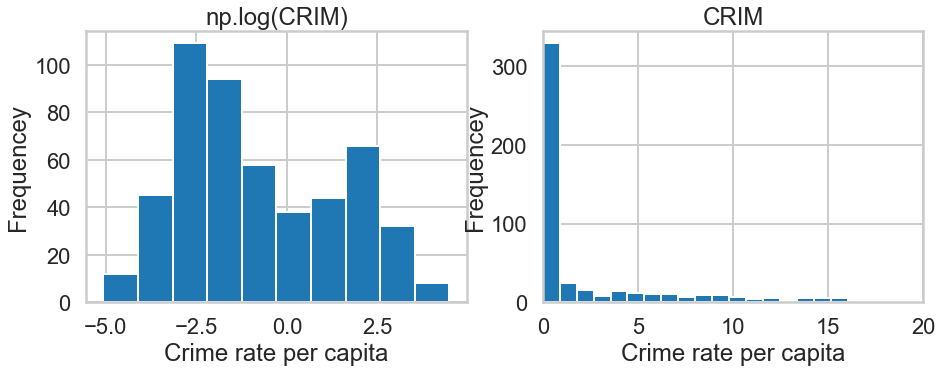

In [94]:
plt.subplots(figsize=(15,5))

plt.subplot(121)
plt.hist(np.log(bos.CRIM))
plt.title("np.log(CRIM)")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")

#your turn
plt.subplot(122)

plt.hist(bos.CRIM, bins=100)
plt.xlim(0,20)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey");

### Joe says:

Taking the log allows us to see a much better relationship between our values with the input is small. In the case of the CRIM, we can see that most of our values are small. Even when adding more bins to the histogram and zooming in on the axis (as seen in the plot on the right), it's still hard to get an accurate sense of the spread in our data when value are close to zero.
<br><br>
In the plots below I've taken the log of the range of intergers from 1 to 100, and compared that with the linear plot of those same intergers. The plot on the left shows that numbers close to zero have a wider range in values, but as the number increase the rate of change in their values decreases. This is clearly seen as the line in the left plot flattens out as it moves towards the right. It's also important to notice the diffence in Y values between the plots.


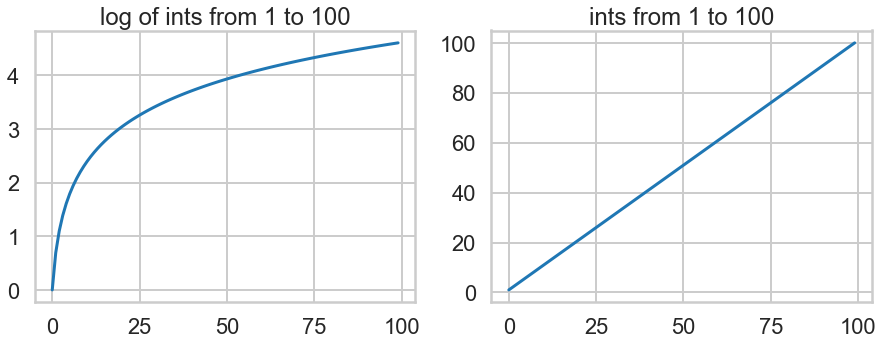

In [97]:
x_range = np.arange(1,101)

plt.subplots(figsize=(15,5))

plt.subplot(121)
plt.title("log of ints from 1 to 100")
plt.plot(np.log(x_range))

plt.subplot(122)
plt.title("ints from 1 to 100")
plt.plot(x_range);

# Exercise: 
Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

### What two variables? I'm not quite sure what they're asking me to plot.
*along with the two variables you picked in the previous section.* What two variables?

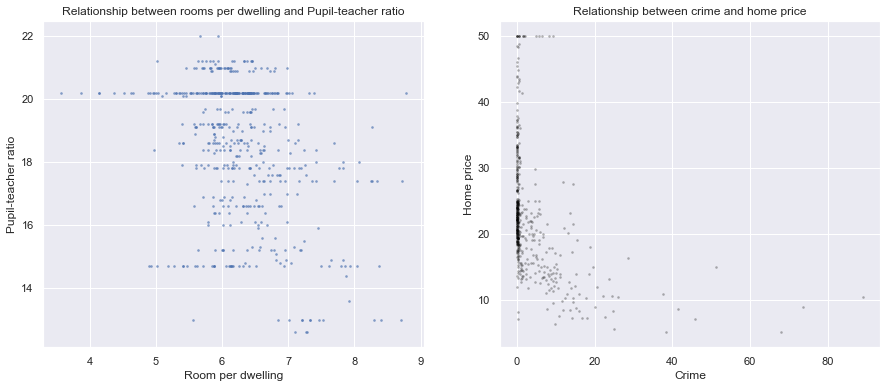

In [138]:
#Plot the histogram for *RM* and *PTRATIO* against each other, including the 2 variables you picked previously. 
#We are looking for correlations in predictors here.
sns.set_style("darkgrid")
plt.subplots(figsize=(15,6))

plt.subplot(121)
plt.scatter(bos.RM, bos.PTRATIO, s=3, alpha=.5)
plt.xlabel("Room per dwelling")
plt.ylabel("Pupil-teacher ratio")
plt.title("Relationship between rooms per dwelling and Pupil-teacher ratio");

plt.subplot(122)
plt.scatter(bos.CRIM, bos.PRICE, s=3, c="black", alpha=.2);
plt.xlabel("Crime")
plt.ylabel("Home price")
plt.title("Relationship between crime and home price");

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [139]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [272]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           2.49e-74
Time:                        10:10:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fits our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. __Note: this box was included with the assignment, but the more I look at it the more I'm thinking this part of the answer key.__

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

__Joe says__
<br>Looking at the plot below I see a strong positive correlation, but also a strange line of values along the top of the plot. I guess that's the ceiling effect that was mentioned in the box above.

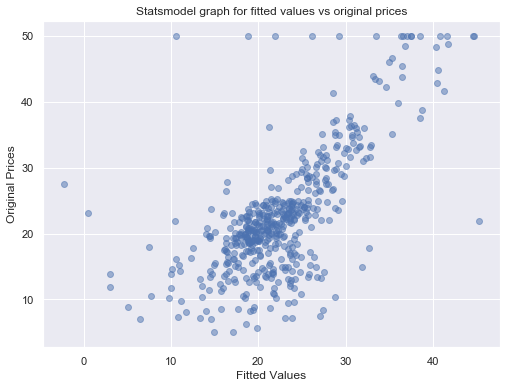

In [273]:
# your turn
plt.subplots(figsize=(18,6))

plt.subplot(121)
plt.scatter(m.fittedvalues, bos.PRICE, alpha=.5)
plt.xlabel("Fitted Values")
plt.ylabel("Original Prices")
plt.title("Statsmodel graph for fitted values vs original prices");

### Fitting Linear Regression using `sklearn`


In [247]:
from sklearn.linear_model import LinearRegression

X = bos.drop('PRICE', axis = 1) #this is the features, or explanatory variables

# This creates a LinearRegression object
lm = LinearRegression()

#we need y
y = bos["PRICE"]

#and fit
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [248]:
# Look inside lm object
print("coef:", lm.coef_)
print("intercept:", lm.intercept_)
print("score:", lm.score(X,y))

coef: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
intercept: 36.45948838508978
score: 0.7406426641094095


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the of coefficients the linear regression using least squares. 

In [215]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


# Your turn (Joe's turn)
	
In order to have a model not fit an intercept term we use: LinearRegression(fit_intercept=False)<br><br>
Should there not be an intercept? Interesting question. The intercept is rougly 36, and we are modeling home prices and the explanatory variables that affect these prices. The variable that affects the home price the most is the number of rooms. Therefore if number of rooms is zero, the home is still 36 (I assume this is 36 thousand dollars). In that case, a home with zero for number of rooms doesn't make sense... as there's really no such thing as a home with no (bed) rooms.
<br><br>
__Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.__
<br><br>
__Exercise: True or False. To use linear regression, Y must be normally distributed.__













### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [156]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508978


In [157]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [158]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [159]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see if they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

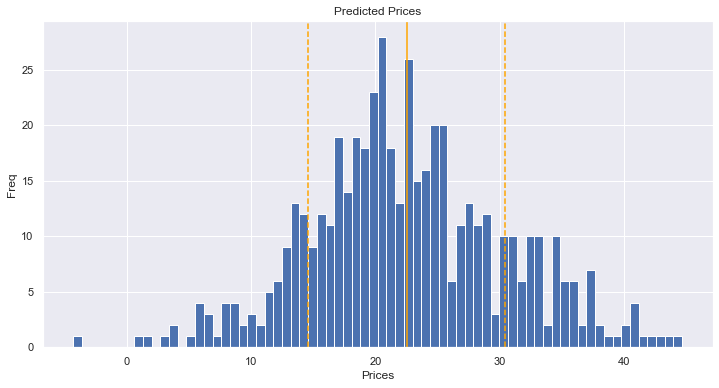

In [175]:
# your turn
predicted = lm.predict(X)

plt.subplots(figsize=(12,6))
plt.hist(predicted, bins = 70)
plt.axvline(np.mean(predicted), c="orange")
plt.axvline(np.mean(predicted) + np.std(predicted), c="orange", linestyle="--")
plt.axvline(np.mean(predicted) - np.std(predicted), c="orange", linestyle="--")

plt.title("Predicted Prices")
plt.xlabel("Prices")
plt.ylabel("Freq");

__1. The predicted prices look like they're mostly normally distributed and centered around a price of 21. There's a bit of a long tail to the left, and there's one data point that is negative for some reason. A negative home price doesn't make sense and my first instinct would be to drop that point.__

__*What might be the reason for them? Should we do anything special with them?*<br>
I'm not sure why it's negative.__

In [178]:
np.sum(predicted <= 0)

1

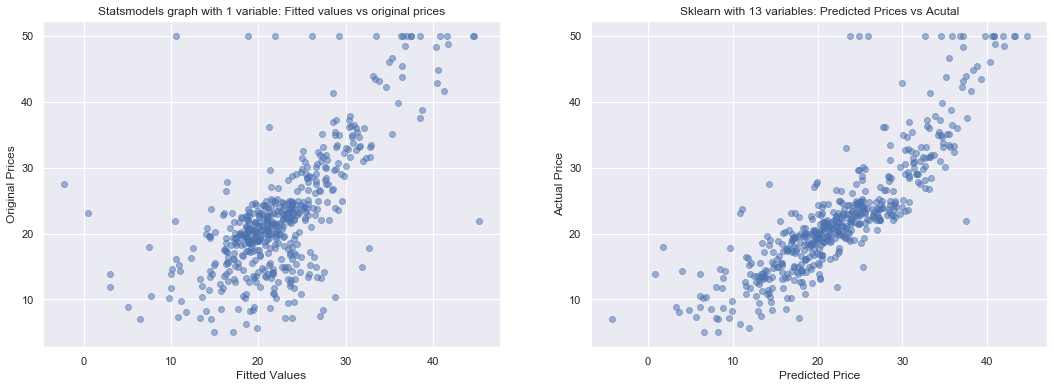

In [277]:
plt.subplots(figsize=(18,6))

plt.subplot(121)
plt.scatter(m.fittedvalues, bos.PRICE, alpha=.5)
plt.xlabel("Fitted Values")
plt.ylabel("Original Prices")
plt.title("Statsmodels graph with 1 variable: Fitted values vs original prices");

plt.subplot(122)
plt.scatter(predicted, bos.PRICE, alpha=.5)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Sklearn with 13 variables: Predicted Prices vs Acutal");

__2. Both plots look very similar for higher values, but the plot on the right shows a higher linear relationship for lower values. Overall, the plot on the right shows tighter grouping with fewer outliers.__
<br><br>
__3. Statsmodels provides beautiful OLS Regression Results. Is there seriously no way to get the same output in sklearn? We got similar data put needed to construct a dataframe.__

In [281]:
#lets compare output for both statsmodels and sklearn with the 13 variables
m13 = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD +TAX +PTRATIO + B + LSTAT', bos).fit()
print(m13.summary())

#from above with sklearn
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 28 Jun 2019   Prob (F-statistic):          6.72e-135
Time:                        10:25:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


# Good Info (for studying)

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [322]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [326]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064252


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [293]:
# your turn
#using sklearn

Xpart3 = bos["PTRATIO"].values.reshape(-1,1) #this is the features, or explanatory variables

# This creates a LinearRegression object
lm_part3 = LinearRegression()

#we need y
ypart3 = bos["PRICE"].values.reshape(-1,1)

#and fit
lm_part3.fit(Xpart3, ypart3)

print("intercept:", lm_part3.intercept_)
print("coefficients:", lm_part3.coef_)

intercept: [62.34462747]
coefficients: [[-2.1571753]]


In [477]:
#the statsmodels way
mpart3 = ols('PRICE ~ PTRATIO', bos).fit()
print(mpart3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           1.61e-34
Time:                        09:36:39   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

__1. The intercept is 62.34 and coef is -2.15. For every increase in the pupil/teacher ratio the home price drops by $2,157. Alternatively, for every decrease in Pupil/Teacher ratio home prices increase.
<br><br>
The intercept value means that for a home with price zero, the pupil/teacher ratio will be 62.34.__

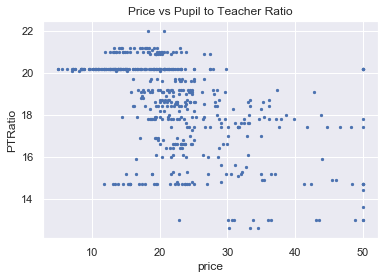

In [303]:
plt.scatter(bos.PRICE, bos.PTRATIO, s=5)
plt.xlabel("price")
plt.ylabel("PTRatio")
plt.title("Price vs Pupil to Teacher Ratio");

In [305]:
#r^2 from statsmodels
mpart3.rsquared

0.257847318009223

In [334]:
#r^2 from sklearn
lm_part3.score(Xpart3, ypart3)

0.257847318009223

__2. Our value for R^2 shows that roughly 25.78% of the housing prices can be explained by the pupil-teacher ratio. This is a weak relationship.__

In [458]:
from sklearn import feature_selection

print("f:", mpart3.fvalue, "f pval:", mpart3.f_pvalue) #stats models
sklearn.feature_selection.f_regression(Xpart3, bos.PRICE, center=True) #sklearn

f: 175.1055428756955 f pval: 1.6095094784729786e-34


(array([175.10554288]), array([1.60950948e-34]))

__3. F-statistic is large, p value is small. Large F means that our model our explanatory variables are deterministic.__

In [468]:
print("f:", mpart3.fvalue, "f pval:", mpart3.f_pvalue) #stats models

print(mpart3.tvalues)

f: 175.1055428756955 f pval: 1.6095094784729786e-34
Intercept    20.581406
PTRATIO     -13.232745
dtype: float64


__4. The F-statistic shows the overall goodness of fit for the model. The t-statistic evaluates one term at a time. The overall F-test can find that the coefficients are significant jointly while the t-tests can fail to find significance individually. The F-test of overall significance is the hypothesis test for this relationship. If the overall F-test is significant, you can conclude that R-squared does not equal zero, and the correlation between the model and dependent variable is statistically significant. In our case the p-values for the t-stat and f-stat are zero which shows our overall model is more significant than a model with no input variables, while the t-stat is showing that PTRATIO is correlated to PRICE.__

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [540]:
# your turn

#using sklearn
X4 = bos[["CRIM", "RM", "PTRATIO"]]#.values.reshape(-1,1) #this is the features, or explanatory variables

# This creates a LinearRegression object
lm4 = LinearRegression()

#we need y
y4 = bos["PRICE"]#.values.reshape(-1,1)

#and fit
lm4.fit(X4, y4)

print("intercept:", lm4.intercept_)
print("coefficients:", lm4.coef_)
print("r^2:", lm4.score(X4, y4)) #sklearn, more like skynet
print("Fisher stat (per input):", sklearn.feature_selection.f_regression(X4, bos.PRICE, center=True)) #sklearn
print("")

#statsmodel
mpart4 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print("T stat:\n", mpart4.tvalues)
print(mpart4.summary())

intercept: -3.3707043351542083
coefficients: [-0.20496083  7.3804111  -1.0695461 ]
r^2: 0.5943412940723471
Fisher stat (per input): (array([ 89.48611476, 471.84673988, 175.10554288]), array([1.17398708e-19, 2.48722887e-74, 1.60950948e-34]))

T stat:
 Intercept    -0.835612
CRIM         -6.398904
RM           18.381756
PTRATIO      -8.051244
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           6.15e-98
Time:                        10:47:19   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model: 

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

* 1. F statistic is high with a low p-value, thus this model with these input variables is better than the intercept model, and our R-squared value can be viewed as significant. 
* 2. The maximum value R^2 can take on is 1. In our case roughly 59% of the dependent variable can be explained by our model/the models inputs.
* 3. The most significant explanatory variable is number of rooms, then PTratio, then CRIM. Each increase in number of rooms will increase the home price roughly 7,380 dollars on average. Each decrease in the Pupil/Teacher ratio will increase the home price by roughly 1,070 dollars on average. Each decrease in crime rate will increase the home price by roughly 205 dollars on average.

[-0.20477899  7.37831528 -1.06895733]


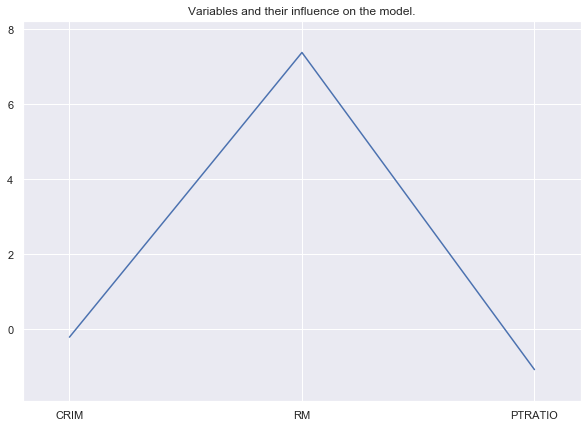

In [537]:
#lasso for finding most significant input variables
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=.0001, normalize=True) #adjust alpha/p-val

# Fit the regressor to the data
lasso.fit(X4, y4)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.figure(figsize=(10, 7))
plt.plot(range(len(X4.columns)), lasso_coef)
plt.xticks(range(len(X4.columns)), X4.columns.values, rotation=0)
plt.title("Variables and their influence on the model.")
plt.margins(0.1)

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. <b>Lower values of AIC indicate better fitting models.</b>

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [541]:
#using sklearn
X5 = bos[["CRIM", "RM", "PTRATIO", "NOX"]]#.values.reshape(-1,1) #this is the features, or explanatory variables

# This creates a LinearRegression object
lm5 = LinearRegression()

#we need y
y5 = bos["PRICE"]#.values.reshape(-1,1)

#and fit
lm5.fit(X5, y5)

print("intercept:", lm5.intercept_)
print("coefficients:", lm5.coef_)
print("r^2:", lm5.score(X5, y5)) #sklearn, more like skynet
print("Fisher stat (per input):", sklearn.feature_selection.f_regression(X5, bos.PRICE, center=True)) #sklearn
print("")

#statsmodel
mpart5 = ols('PRICE ~ CRIM + RM + PTRATIO + NOX', bos).fit()
print("T stat:\n", mpart5.tvalues)
print(mpart5.summary())

intercept: 6.640514928403109
coefficients: [ -0.1390552    6.9041508   -1.06741164 -13.15252671]
r^2: 0.6156646253010178
Fisher stat (per input): (array([ 89.48611476, 471.84673988, 175.10554288, 112.59148028]), array([1.17398708e-19, 2.48722887e-74, 1.60950948e-34, 7.06504159e-24]))

T stat:
 Intercept     1.521324
CRIM         -4.136210
RM           17.196040
PTRATIO      -8.246801
NOX          -5.272192
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sat, 29 Jun 2019   Prob (F-statistic):          1.45e-102
Time:                        10:49:16   Log-Likelihood:                -1598.3
No. Observations:                 506   AIC:                             3207.
Df Residuals:         

__I've addedd the NOX variable to the model. The previous model's AIC was 3232, the latest model's AIC is 3207. Lower values indicate a better fit when compared to one another.__ <br><br>
__The previous model's F stat was 245.2, the lastest model's F stat is 200.6. Both p-values are nearly zero, but the previous model's pval was lower.__

In [545]:
from statsmodels.stats.anova import anova_lm

reduced_model = mpart4
full_model = mpart5

anova_results = anova_lm(reduced_model, full_model) #old model, new model with added variable
anova_results

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,17328.237120,0.0,NaN,NaN,NaN
1,501.0,16417.383404,1.0,910.853716,27.796007,2.007941e-07


In [552]:
df_reduced = anova_results["df_resid"][0]
df_full = anova_results["df_resid"][1]

F = ((reduced_model.ssr - full_model.ssr) / (df_reduced - df_full)) / (full_model.ssr/df_full)
F

27.796007468557868

In [547]:
3232-3207

25


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>
It doesn't look super linear. It looks curvilinear. In order for a linear model to be accurate we would hope to see strong homoskedacity between the fitted values and residuals.

In [652]:
#the statsmodels way
#model = ols('PRICE ~ PTRATIO', bos) #Which model from part three?
model = ols('PRICE ~ CRIM + RM + PTRATIO', bos)
fitted = model.fit()
#print(fitted.summary())

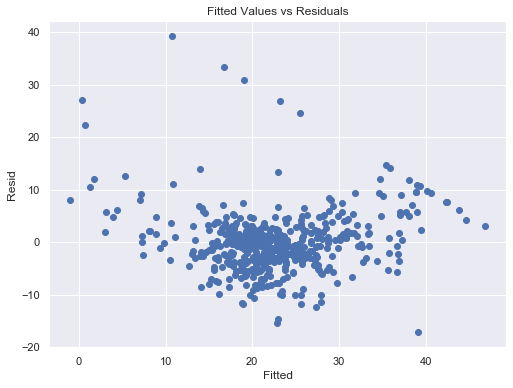

In [653]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(fitted.fittedvalues, fitted.resid, "bo")
plt.xlabel("Fitted")
plt.ylabel("Resid")
plt.title("Fitted Values vs Residuals");

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>
The most of the residuals are normally distributed, but there are some outliers in the highest values.

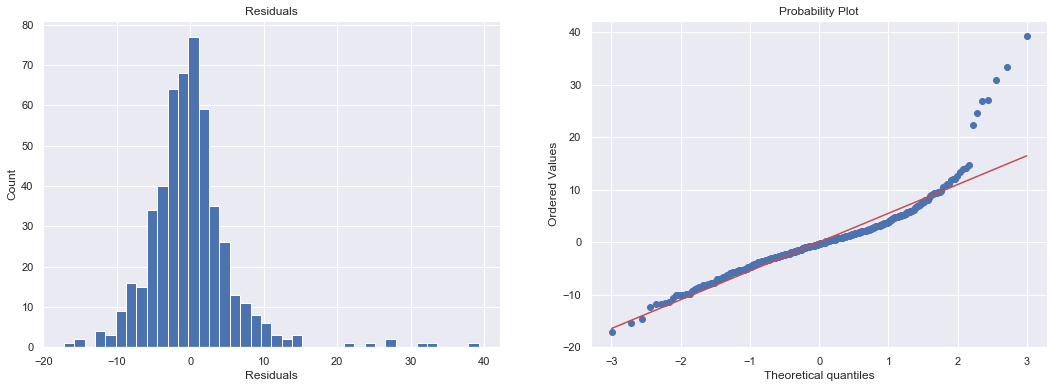

In [645]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(fitted.resid, bins=40)
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title("Residuals");

plt.subplot(122)
stats.probplot(fitted.resid, dist="norm", plot=plt);

#_ = sm.graphics.qqplot(fitted.resid, line="s");

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>
Fitted vs residual is a good test for homoskedacity, while the qq plot is a good test for normality among the residuals. Shout-out to my friend the histogram of the residuals too. I don't think I'll ever use a qq with a hist.

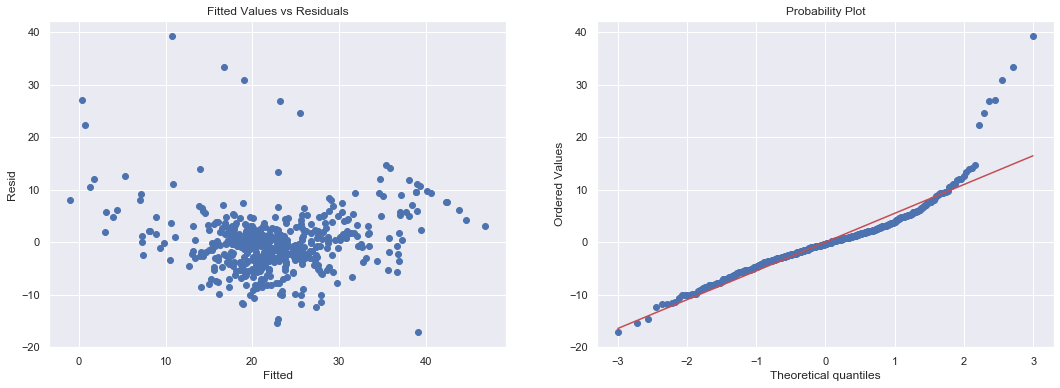

In [647]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(fitted.fittedvalues, fitted.resid, "bo")
plt.xlabel("Fitted")
plt.ylabel("Resid")
plt.title("Fitted Values vs Residuals");

plt.subplot(122)
stats.probplot(fitted.resid, dist="norm", plot=plt);

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

Looking at the DF for our outliers with residuals greater than 20 (seen below), we see a group of houses of varying price which appear to be in the same town.

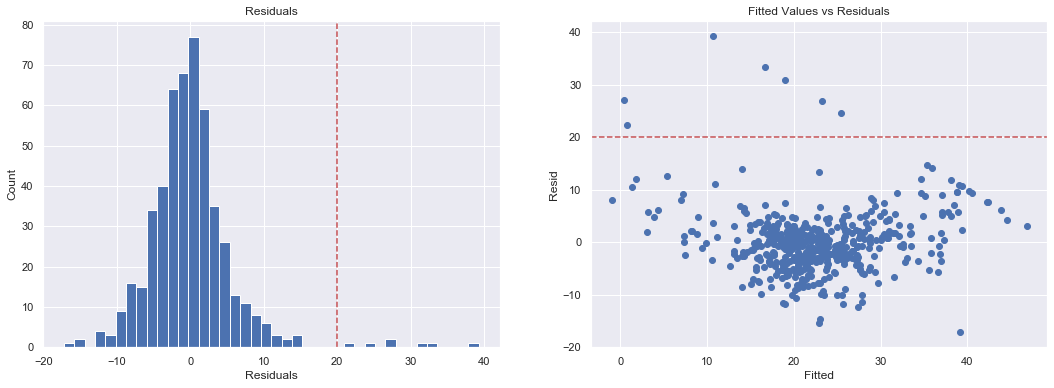

In [740]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(fitted.resid, bins=40)
plt.axvline(20, c="r", linestyle="--")
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title("Residuals");

plt.subplot(122)
plt.plot(fitted.fittedvalues, fitted.resid, "bo")
plt.axhline(20, c="r", linestyle="--")
plt.xlabel("Fitted")
plt.ylabel("Resid")
plt.title("Fitted Values vs Residuals");

In [742]:
bos[fitted.resid >20]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


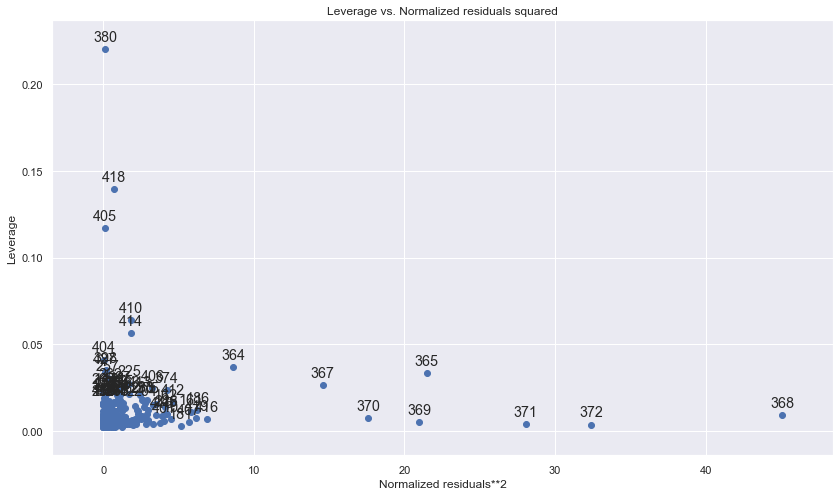

In [687]:
from statsmodels.graphics.regressionplots import *
fig1, ax1 = plt.subplots(figsize=(14, 8))

fig1 = plot_leverage_resid2(fitted, ax=ax1)

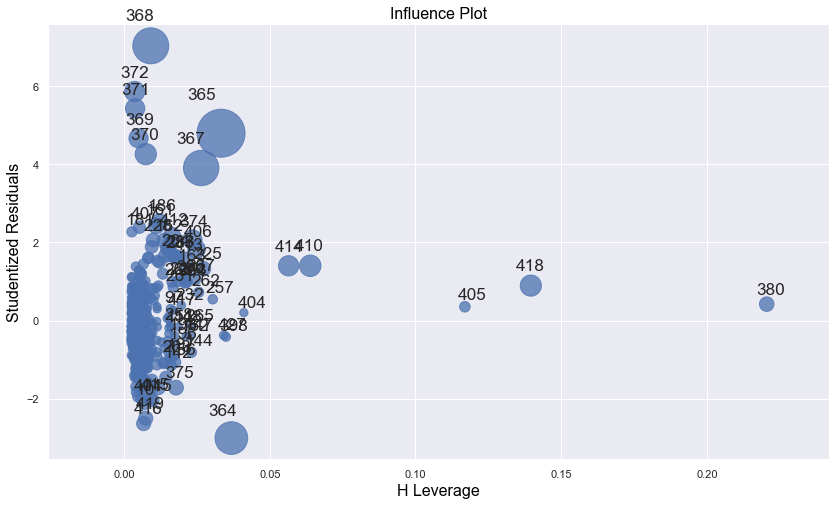

In [679]:
fig1, ax1 = plt.subplots(figsize=(14, 8))
fig1 = influence_plot(fitted, ax=ax1);

In [759]:
ind = [368,372,371,369,370,365,367,414,410,405,418,380,364]
bos_outliers = bos.iloc[ind]
bos_outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
414,45.74610,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
410,51.13580,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
405,67.92080,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

R^2 goes from 59 to 73. Although it's still hard to see a great linear relationship on the scatter plot.

In [760]:
bos_adjusted = bos.drop(ind)
model_adjusted = ols('PRICE ~ CRIM + RM + PTRATIO', bos_adjusted).fit()

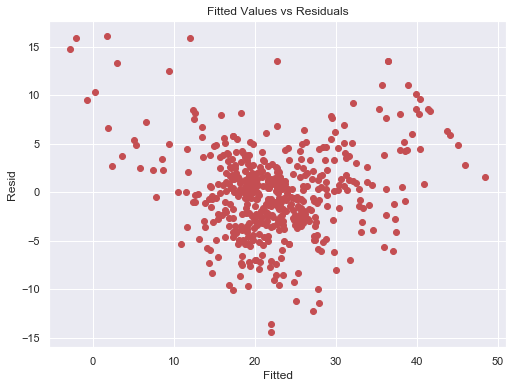

In [761]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(model_adjusted.fittedvalues, model_adjusted.resid, "ro")
plt.xlabel("Fitted")
plt.ylabel("Resid")
plt.title("Fitted Values vs Residuals");

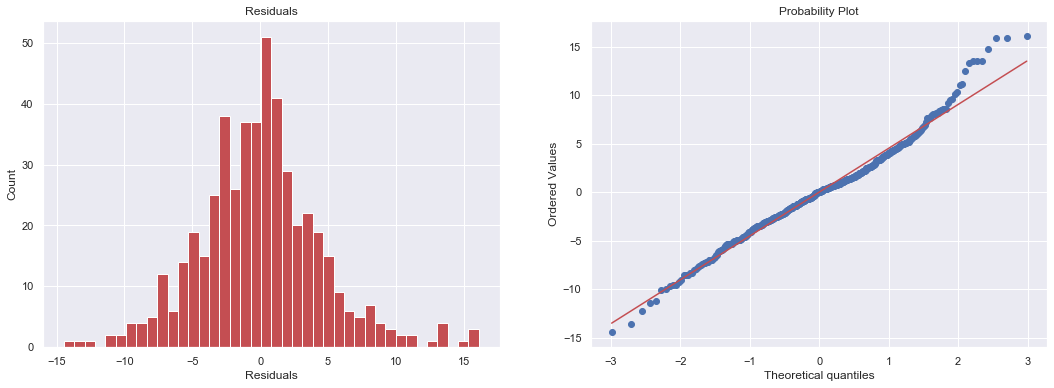

In [762]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(model_adjusted.resid, bins=40, color="r")
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title("Residuals");

plt.subplot(122)
stats.probplot(model_adjusted.resid, dist="norm", plot=plt);

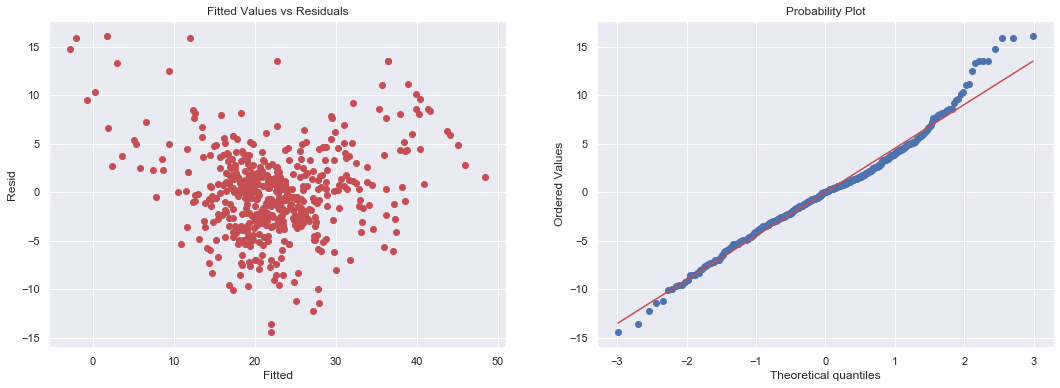

In [763]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(model_adjusted.fittedvalues, model_adjusted.resid, "ro")
plt.xlabel("Fitted")
plt.ylabel("Resid")
plt.title("Fitted Values vs Residuals");

plt.subplot(122)
stats.probplot(model_adjusted.resid, dist="norm", plot=plt);

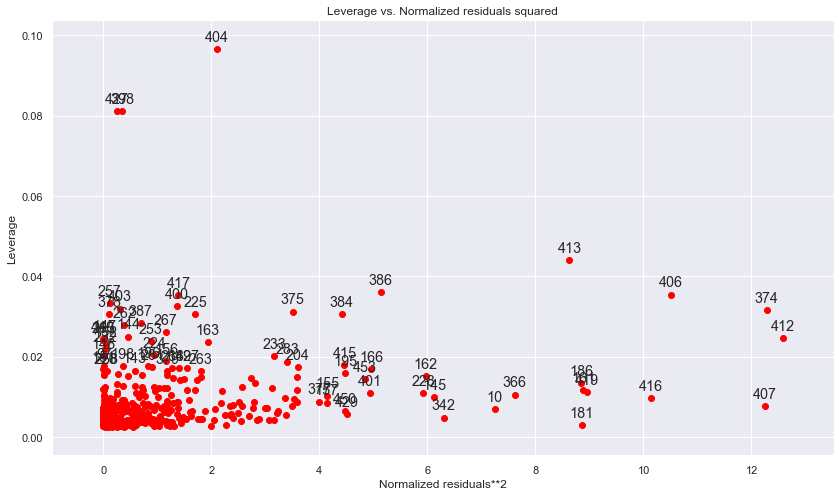

In [764]:
fig1, ax1 = plt.subplots(figsize=(14, 8))
fig1 = plot_leverage_resid2(model_adjusted, ax=ax1, color="red")

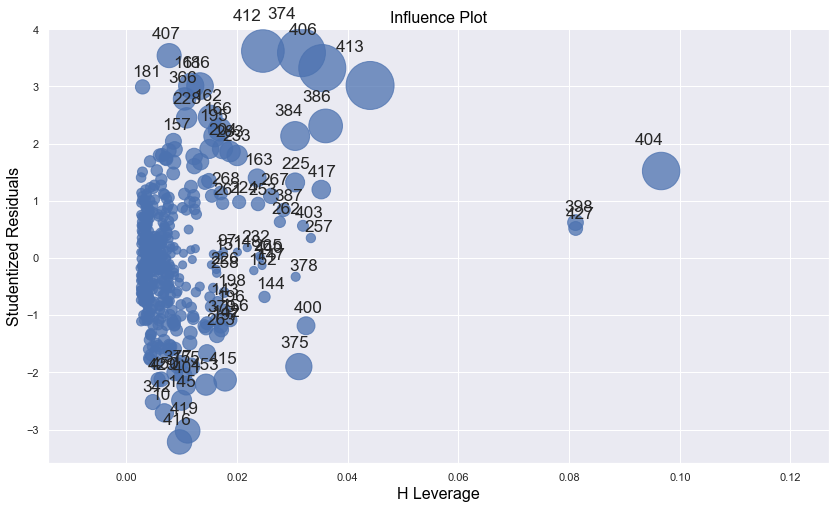

In [765]:
fig3, ax3 = plt.subplots(figsize=(14, 8))
fig3 = influence_plot(model_adjusted, ax=ax3, c="red");

In [756]:
print(fitted.summary())
print(model_adjusted.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           6.15e-98
Time:                        14:01:20   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4